<a href="https://colab.research.google.com/github/manish-anandani/Data-Science-Projects/blob/main/Credit_risk_modelling_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

Predict the **loan defaulters** using a Logistic Regression model on the credit risk data and calculate credit scores

## Learning Objectives

At the end of the mini-project, we will be able to :

* perform data exploration, preprocessing and visualization
* implement Logistic Regression using manual code or using sklearn library
* evaluate the model using appropriate performance metrics
* develop a credit scoring system

## Dataset

The dataset for this mini-project is the [Give Me Some Credit](https://cdn.iisc.talentsprint.com/CDS/Give_me_some_credit_BigML.pdf) dataset which can be used to build models for predicting loan repayment defaulters
#### Datafields

- **SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **age:** Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income
- **MonthlyIncome:** Monthly income
- **NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- **NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines:**	Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse:**	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

## Information

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. From the lender's perspective, credit risk could disrupt its cash flows or increase collection costs, since the lender may be forced to hire a debt collection agency to enforce the collection. The loss may be partial or complete, where the lender incurs a loss of part of the loan or the entire loan extended to the borrower.

Credit scoring algorithms, which calculate the probability of default, are the best methods that banks use to determine whether or not a loan should be granted.

In order to build a credit scoring system, the following feature transformations are performed:

#### Weight of Evidence and Information value

Logistic regression is a commonly used technique in credit scoring for solving binary classification problems. Prior to model fitting, another iteration of variable selection is valuable to check if the newly WOE transformed variables are still good model candidates. Preferred candidate variables are those with higher information value having a linear relationship with the dependent variable, have good coverage across all categories, have a normal distribution, contain a notable overall contribution, and are relevant to the business.

**Weight of evidence** (WOE) is a powerful tool for feature representation and evaluation in data science. WOE can provide interpret able transformation to both categorical and numerical features. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan. WOE can be calculated using the below formula:

$$WOE = ln \left( \frac{\%   of  Non\_Events}{\%   of  Events} \right)$$

Steps to calculate WOE
* For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
* Calculate the number of events and non-events in each group (bin)
* Calculate the % of events and % of non-events in each group.
* Calculate WOE by taking natural log of division of % of non-events and % of events

**Information value** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
$$IV = ∑ (\% of Non\_Events - \% of Events) * WOE$$

Read more about `WOE` and `IV` from the following [link](https://medium.com/@yanhuiliu104/credit-scoring-scorecard-development-process-8554c3492b2b)

### Download the dataset

In [1]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/GiveMeSomeCredit.csv
!pip -qq install xverse
print("Data Downloaded Successfully!")

Data Downloaded Successfully!


### Install Packages

In [2]:
!pip install pandas==1.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 38.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.3.5 which is incompatible.
plotnine 0.12.3 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
xarray 2023.7.0 requires pandas>=1.4, but you have pandas 1.3.5 which is incompatible.


In [3]:
!pip install xverse

### Import Neccesary Packages

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import math
from xverse.transformer import MonotonicBinning,WOE
%matplotlib inline

### Load the dataset

In [5]:
# Read the csv
df = pd.read_csv("GiveMeSomeCredit.csv")


#### Describe the all statistical properties of the train dataset

In [8]:
# Use info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [6]:
# Removing outliers in age column (18 =< age =< 100) method 1
df_filtered = df[(df['age']>=18) & (df['age']<=100)]
df_filtered.age.value_counts().sort_index()


21    183
22    434
23    641
24    816
25    953
     ... 
95     45
96     18
97     17
98      6
99      9
Name: age, Length: 79, dtype: int64

<Axes: ylabel='Count'>

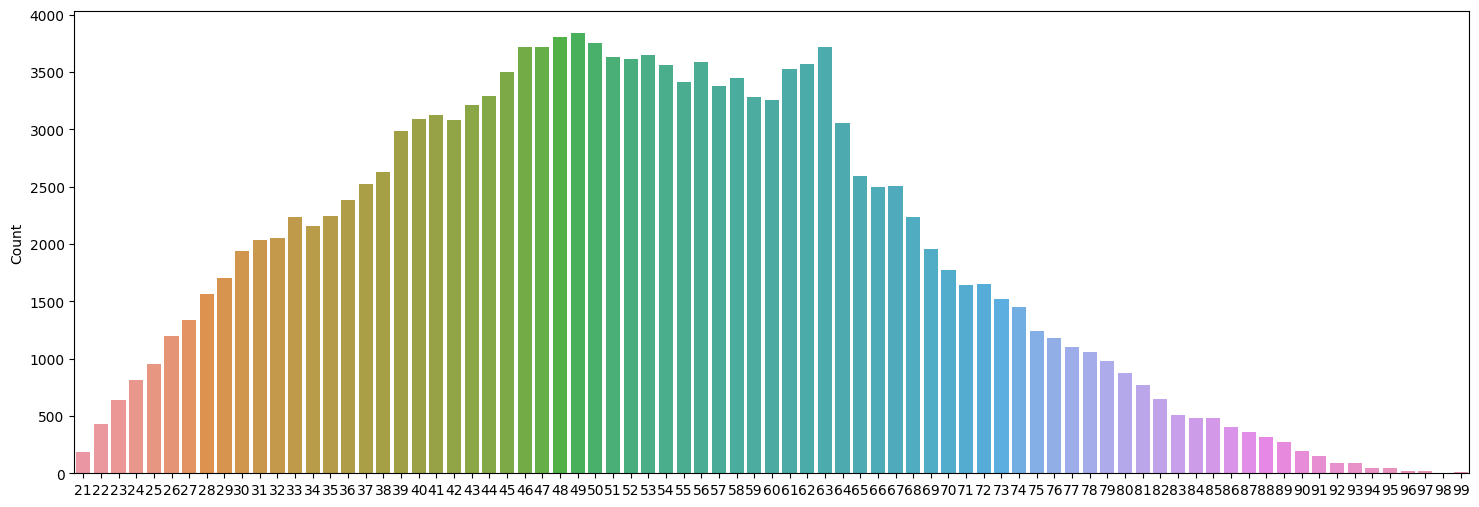

In [9]:
# Check the distribution of the age column
df_age = df_filtered.age.value_counts().sort_index().to_frame()
df_age.rename(columns={'age': 'Count'}, inplace=True)
plt.figure(figsize=(18, 6))
sns.barplot(data=df_age, x=df_age.index, y=df_age.Count)


### Pre-processing

#### Remove unwanted columns

In [10]:
df_filtered.pop('Unnamed: 0')
df_filtered

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


#### Handle the missing data

Find the how many null values in the dataset and fill with mean or remove.

In [11]:

# Create an instance of SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

df_filtered['MonthlyIncome'] = imputer.fit_transform(df_filtered[['MonthlyIncome']])
df_filtered['NumberOfDependents'] = imputer.fit_transform(df_filtered[['NumberOfDependents']])

df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149986 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149986 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149986 non-null  float64
 2   age                                   149986 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149986 non-null  int64  
 4   DebtRatio                             149986 non-null  float64
 5   MonthlyIncome                         149986 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149986 non-null  int64  
 7   NumberOfTimes90DaysLate               149986 non-null  int64  
 8   NumberRealEstateLoansOrLines          149986 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149986 non-null  int64  
 10  NumberOfDependents                    149986 non-null  float64
dtype

### EDA &  Visualization ( 1 point)

#### Calculate the percentage of the target lebels and visualize with a graph

In [12]:
df_filtered.SeriousDlqin2yrs.value_counts()


0    139961
1     10025
Name: SeriousDlqin2yrs, dtype: int64

6.683957169335805 93.31604283066419


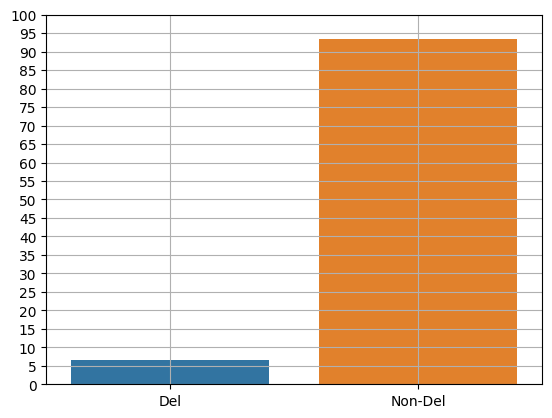

In [13]:
tot_samples = len(df_filtered)
non_del_percent = list(df_filtered.SeriousDlqin2yrs.value_counts())[0]/tot_samples*100
del_percent = list(df_filtered.SeriousDlqin2yrs.value_counts())[1]/tot_samples*100
print(del_percent,non_del_percent)

# sns.set(style="whitegrid")
sns.barplot(x=['Del', 'Non-Del'], y=[del_percent, non_del_percent])
plt.yticks(np.arange(0,105,5))
plt.grid(which='both', visible=True)
plt.show()

In [14]:
# Delinquency distribution for different ages
df_filtered.groupby("age")['SeriousDlqin2yrs'].value_counts()

age  SeriousDlqin2yrs
21   0                   170
     1                    13
22   0                   398
     1                    36
23   0                   571
                        ... 
96   0                    18
97   0                    17
98   0                     6
99   0                     7
     1                     2
Name: SeriousDlqin2yrs, Length: 154, dtype: int64

#### Plot the distribution of SeriousDlqin2yrs by age

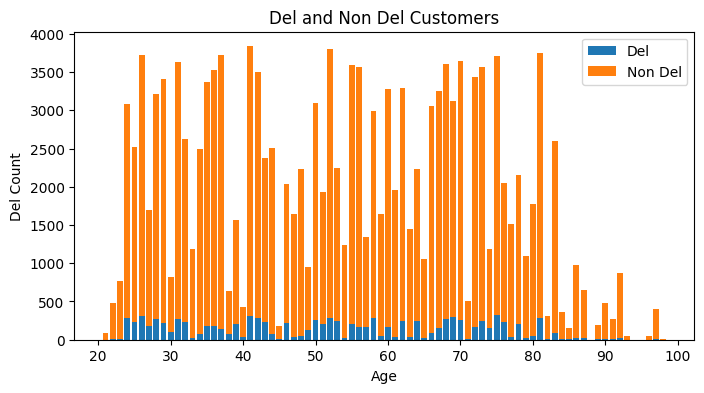

In [15]:
age = df_filtered['age'].unique()
grouped = df_filtered.groupby("age")['SeriousDlqin2yrs'].value_counts()

category_to_count = 1
list1 = grouped.unstack().get(category_to_count, 0)

category_to_count = 0
list2 = grouped.unstack().get(category_to_count, 0)

categories = age
# list1 = casual
# list2 = registered

# Create a stacked bar graph
plt.figure(figsize=(8, 4))
plt.bar(categories, list1, label='Del')
plt.bar(categories, list2, bottom=list1, label='Non Del')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Del Count')
plt.title('Del and Non Del Customers')
plt.legend(loc='upper right')

# Show the plot
plt.show()


[  0.           3.44827586   6.89655172  10.34482759  13.79310345
  17.24137931  20.68965517  24.13793103  27.5862069   31.03448276
  34.48275862  37.93103448  41.37931034  44.82758621  48.27586207
  51.72413793  55.17241379  58.62068966  62.06896552  65.51724138
  68.96551724  72.4137931   75.86206897  79.31034483  82.75862069
  86.20689655  89.65517241  93.10344828  96.55172414 100.        ]


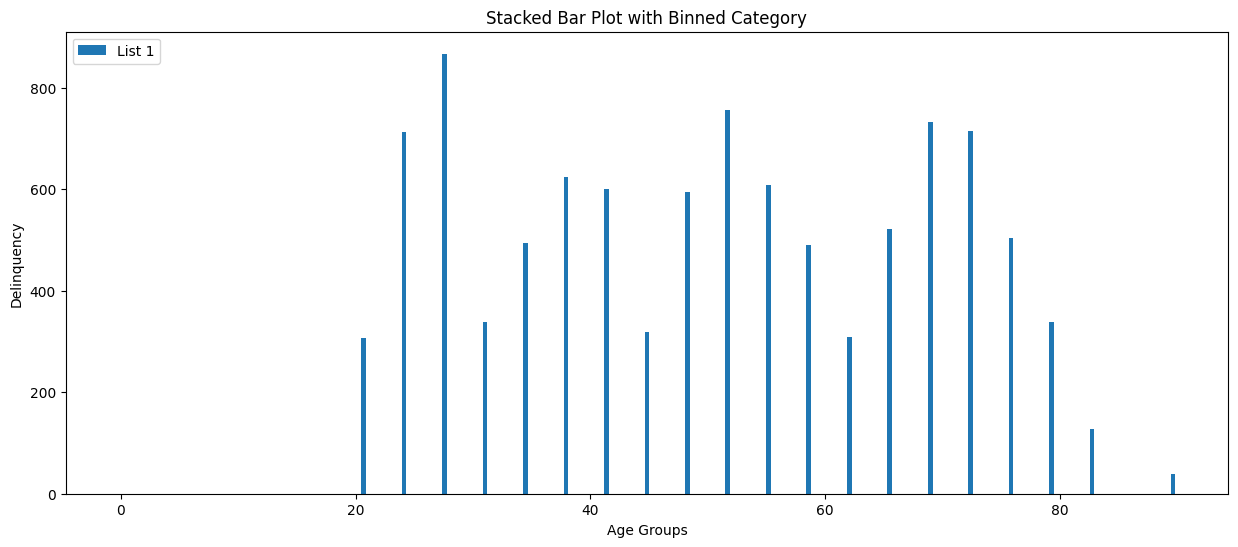

In [22]:
# Visualization of delinquency for age groups
category = df_filtered['age'].unique() # cat is age
bins = np.linspace(0, 100, 30)
binned_category = np.digitize(category, bins)
print(bins)
bin_values1 = [sum(list1[binned_category == i]) for i in range(1, 30)]
bin_values2 = [sum(list2[binned_category == i]) for i in range(1, 30)]

plt.figure(figsize=(15, 6))
plt.bar(bins[:-1], bin_values1, width=0.4, label='List 1')
# plt.bar(bins[:-1], bin_values2, width=0.4, bottom=bin_values1, label='List 2')
plt.xlabel('Age Groups')
plt.ylabel('Delinquency')
plt.title('Stacked Bar Plot with Binned Category')
plt.legend()
plt.show()

#### Calculate the correlation and plot the heatmap

In [23]:
# Move the target column to the end so that we can read the heat map better
column_to_move = 'SeriousDlqin2yrs'

# Move the column to the end
column_series = df_filtered.pop(column_to_move)  # Remove the column
df_filtered[column_to_move] = column_series  # Re-add the column at the end

df_filtered

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,0
149996,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,0
149997,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0,0
149998,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,0


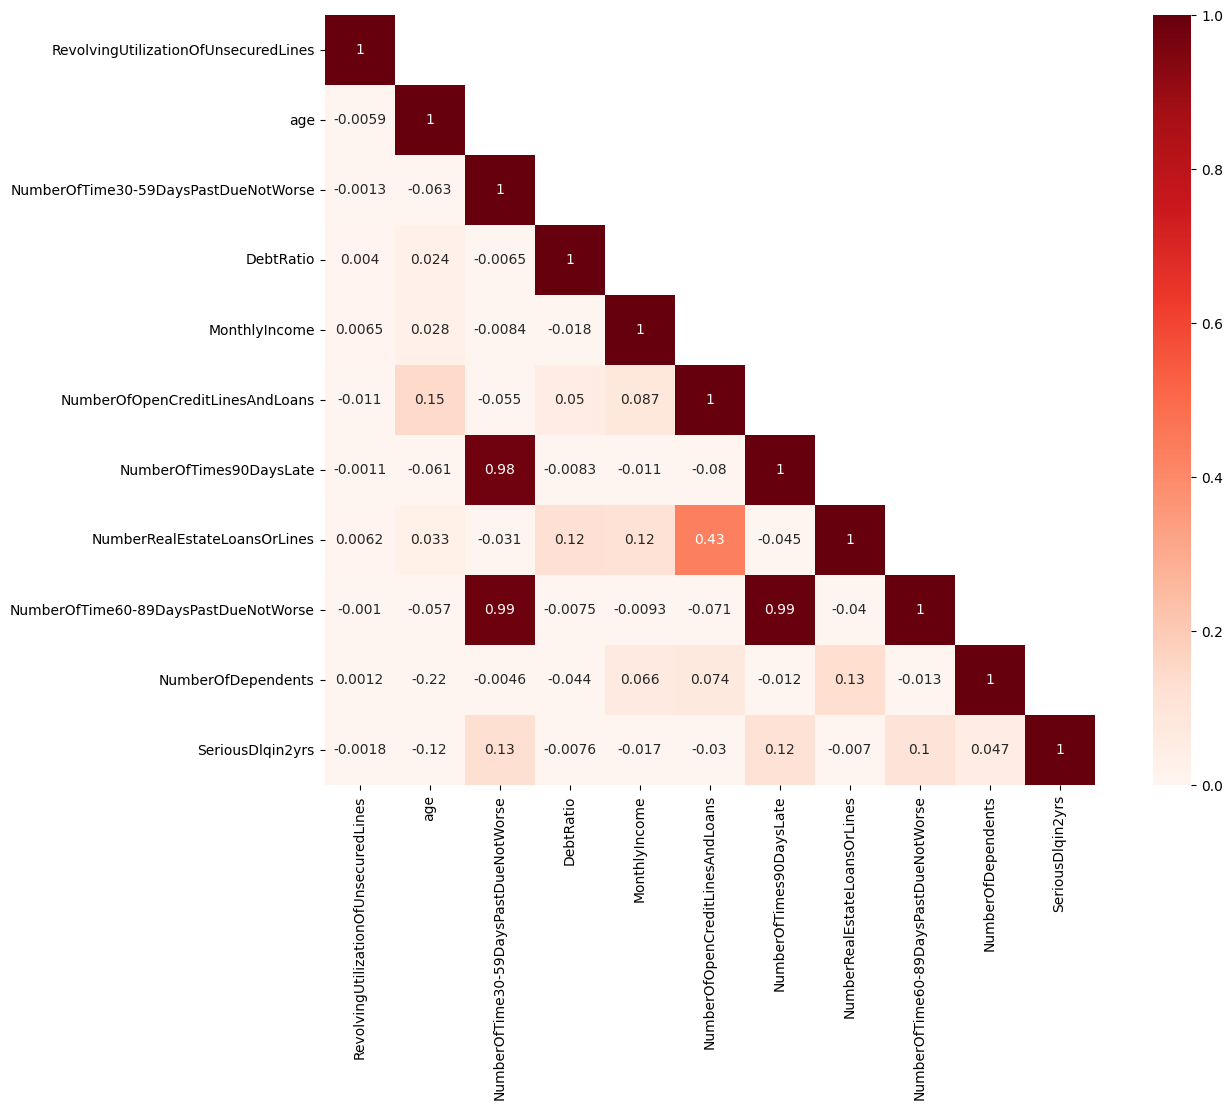

In [24]:
matrix = df_filtered.corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False

plt.figure(figsize=(15, 10))
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")
plt.show()

### Data Engineering

#### Weight of Evidence and Information value

* Arrange the binning for each variable with different bins
    * For eg. Age = 49, Age_quantile_range = (48, 56)
* Calculate information value and chooose the best features based on the rules given below

| Information Value |	Variable Predictiveness |
| --- | --- |
| Less than 0.02	|  Not useful for prediction |
| 0.02 to 0.1	| Weak predictive Power |
|  0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

* Calculate Weight of evidence for the selected variables

Hint: Use [xverse](https://towardsdatascience.com/introducing-xverse-a-python-package-for-feature-selection-and-transformation-17193cdcd067). It is a machine learning Python module in the space of feature engineering, feature transformation and feature selection. It provides pre-built functions for the above steps, such as binning and conversion to WoE.

In [25]:
from xverse.feature_subset import FeatureSubset
from xverse.feature_subset import SplitXY

numerical_features = list(df_filtered._get_numeric_data().columns)
categorical_features = list(df_filtered.columns.difference(numerical_features))

print(numerical_features)
print(categorical_features)


['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'SeriousDlqin2yrs']
[]


In [28]:
clf = SplitXY(['SeriousDlqin2yrs']) #Split the dataset into X and y
X, y = clf.fit_transform(df_filtered) #returns features (X) dataset and target(Y) as a numpy array

y

array([1, 0, 0, ..., 0, 0, 0])

In [29]:
from xverse.transformer import MonotonicBinning

clf = MonotonicBinning()
clf.fit(X, y)

output_bins = clf.bins
out_X = clf.transform(X)
out_X.head()


,DebtRatio,MonthlyIncome,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,RevolvingUtilizationOfUnsecuredLines,age
0,"(0.57, 329664.0]","(6162.0, 3008750.0]","(1.0, 20.0]","(10.0, 58.0]","(1.0, 98.0]","(-0.001, 1.0]","(-0.001, 1.0]","(1.0, 54.0]","(0.38, 50708.0]","(20.999, 45.0]"
1,"(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 1.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(0.38, 50708.0]","(20.999, 45.0]"
2,"(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 1.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(0.38, 50708.0]","(20.999, 45.0]"
3,"(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 1.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(0.0544, 0.38]","(20.999, 45.0]"
4,"(-0.001, 0.238]","(6162.0, 3008750.0]","(-0.001, 1.0]","(6.0, 10.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(0.38, 50708.0]","(45.0, 59.0]"


In [30]:
clf.bins

{'DebtRatio': array([0.00000000e+00, 2.38195756e-01, 5.69897343e-01, 3.29664000e+05]),
 'MonthlyIncome': array([      0.,    4700.,    6162., 3008750.]),
 'NumberOfDependents': array([ 0.,  1., 20.]),
 'NumberOfOpenCreditLinesAndLoans': array([ 0.,  6., 10., 58.]),
 'NumberOfTime30-59DaysPastDueNotWorse': array([ 0.,  1., 98.]),
 'NumberOfTime60-89DaysPastDueNotWorse': array([ 0.,  1., 98.]),
 'NumberOfTimes90DaysLate': array([ 0.,  1., 98.]),
 'NumberRealEstateLoansOrLines': array([ 0.,  1., 54.]),
 'RevolvingUtilizationOfUnsecuredLines': array([0.00000000e+00, 5.44225930e-02, 3.79965458e-01, 5.07080000e+04]),
 'age': array([21., 45., 59., 99.])}

In [31]:
from xverse.transformer import WOE

clf = WOE()
clf.fit(X, y)

out_X = clf.transform(X)
out_X

,DebtRatio,MonthlyIncome,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,RevolvingUtilizationOfUnsecuredLines,age
0,0.147207,-0.291730,0.269425,-0.043910,1.900745,-0.098001,-0.176694,-0.066022,0.916313,0.414695
1,-0.108803,0.300514,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,0.024265,0.916313,0.414695
2,-0.108803,0.300514,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,0.024265,0.916313,0.414695
3,-0.108803,0.300514,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,0.024265,-0.801905,0.414695
4,-0.108803,-0.291730,-0.088289,-0.200241,-0.257722,-0.098001,-0.176694,0.024265,0.916313,0.043665
...,...,...,...,...,...,...,...,...,...,...
149995,-0.108803,0.300514,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,0.024265,-1.390374,-0.804931
149996,0.147207,-0.091023,0.269425,0.161768,-0.257722,-0.098001,-0.176694,0.024265,-0.801905,0.414695
149997,0.147207,-0.091023,-0.088289,-0.043910,-0.257722,-0.098001,-0.176694,0.024265,-0.801905,0.043665
149998,-0.108803,-0.091023,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,0.024265,-1.390374,0.414695


In [32]:
clf.woe_bins

{'DebtRatio': {Interval(-0.001, 0.238, closed='right'): -0.10880320749211447,
  Interval(0.238, 0.57, closed='right'): -0.05438472087606064,
  Interval(0.57, 329664.0, closed='right'): 0.14720743134022587},
 'MonthlyIncome': {Interval(-0.001, 4700.0, closed='right'): 0.3005141418097902,
  Interval(4700.0, 6162.0, closed='right'): -0.09102260735964136,
  Interval(6162.0, 3008750.0, closed='right'): -0.291729751680042},
 'NumberOfDependents': {Interval(-0.001, 1.0, closed='right'): -0.08828856647222107,
  Interval(1.0, 20.0, closed='right'): 0.2694245011781736},
 'NumberOfOpenCreditLinesAndLoans': {Interval(-0.001, 6.0, closed='right'): 0.16176768572197334,
  Interval(6.0, 10.0, closed='right'): -0.2002406647410658,
  Interval(10.0, 58.0, closed='right'): -0.043910178773996264},
 'NumberOfTime30-59DaysPastDueNotWorse': {Interval(-0.001, 1.0, closed='right'): -0.2577223886188556,
  Interval(1.0, 98.0, closed='right'): 1.9007449615488872},
 'NumberOfTime60-89DaysPastDueNotWorse': {Interval

In [33]:
clf.woe_df.head(30)

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,DebtRatio,"(-0.001, 0.238]",49996,3018,46978,0.060365,0.939635,0.301047,0.335651,-0.108803,0.012428
1,DebtRatio,"(0.238, 0.57]",49995,3176,46819,0.063526,0.936474,0.316808,0.334515,-0.054385,0.012428
2,DebtRatio,"(0.57, 329664.0]",49995,3831,46164,0.076628,0.923372,0.382145,0.329835,0.147207,0.012428
3,MonthlyIncome,"(-0.001, 4700.0]",50270,4434,45836,0.088204,0.911796,0.442294,0.327491,0.300514,0.062169
4,MonthlyIncome,"(4700.0, 6162.0]",49722,3052,46670,0.061381,0.938619,0.304439,0.333450,-0.091023,0.062169
5,MonthlyIncome,"(6162.0, 3008750.0]",49994,2539,47455,0.050786,0.949214,0.253267,0.339059,-0.291730,0.062169
6,NumberOfDependents,"(-0.001, 1.0]",117129,7208,109921,0.061539,0.938461,0.719002,0.785369,-0.088289,0.023740
7,NumberOfDependents,"(1.0, 20.0]",32857,2817,30040,0.085735,0.914265,0.280998,0.214631,0.269425,0.023740
8,NumberOfOpenCreditLinesAndLoans,"(-0.001, 6.0]",60195,4675,55520,0.077664,0.922336,0.466334,0.396682,0.161768,0.023283
9,NumberOfOpenCreditLinesAndLoans,"(6.0, 10.0]",46784,2591,44193,0.055382,0.944618,0.258454,0.315752,-0.200241,0.023283


In [34]:
clf.iv_df


,Variable_Name,Information_Value
8,RevolvingUtilizationOfUnsecuredLines,0.935950
6,NumberOfTimes90DaysLate,0.484255
4,NumberOfTime30-59DaysPastDueNotWorse,0.471557
5,NumberOfTime60-89DaysPastDueNotWorse,0.264852
9,age,0.219958
1,MonthlyIncome,0.062169
2,NumberOfDependents,0.023740
3,NumberOfOpenCreditLinesAndLoans,0.023283
0,DebtRatio,0.012428
7,NumberRealEstateLoansOrLines,0.001602


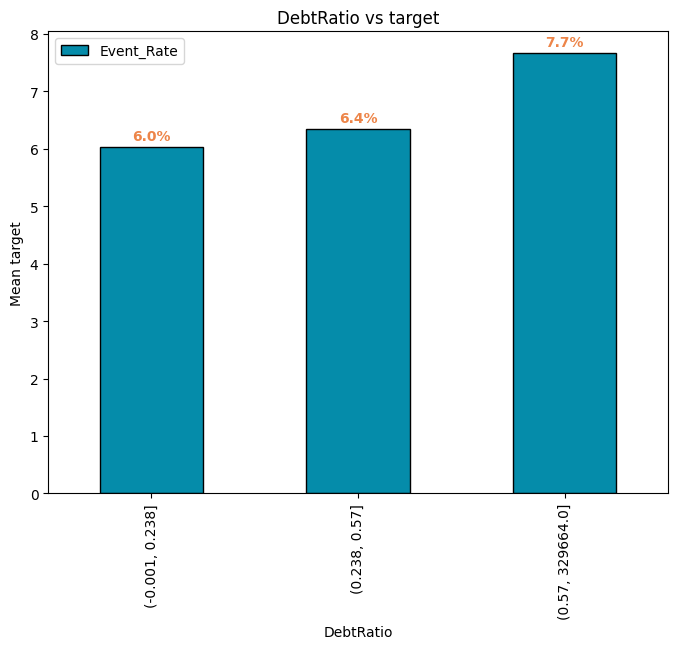

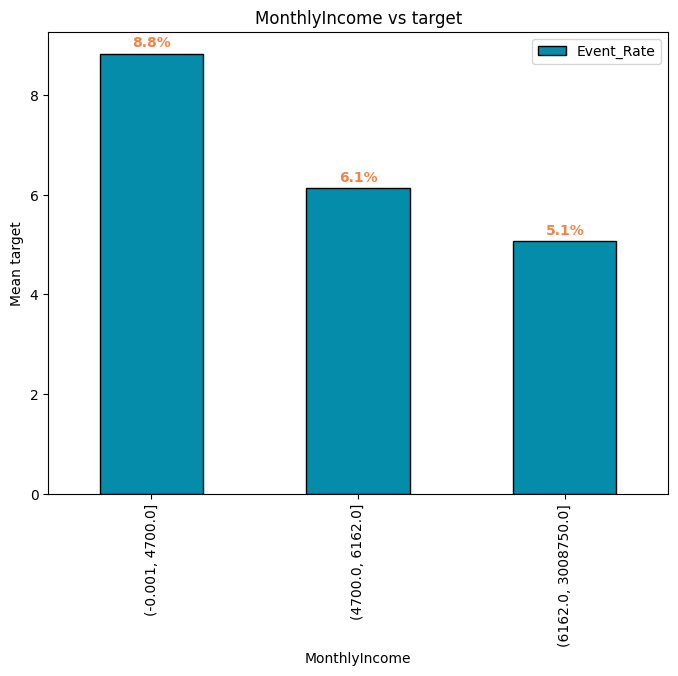

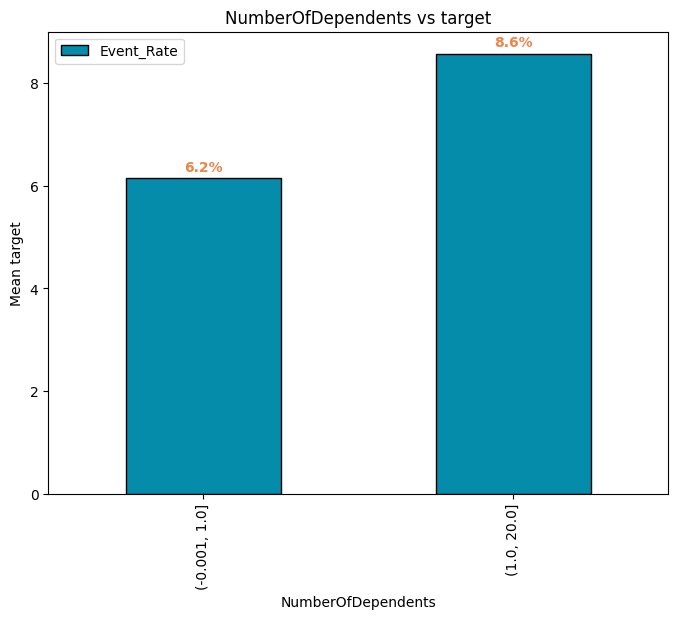

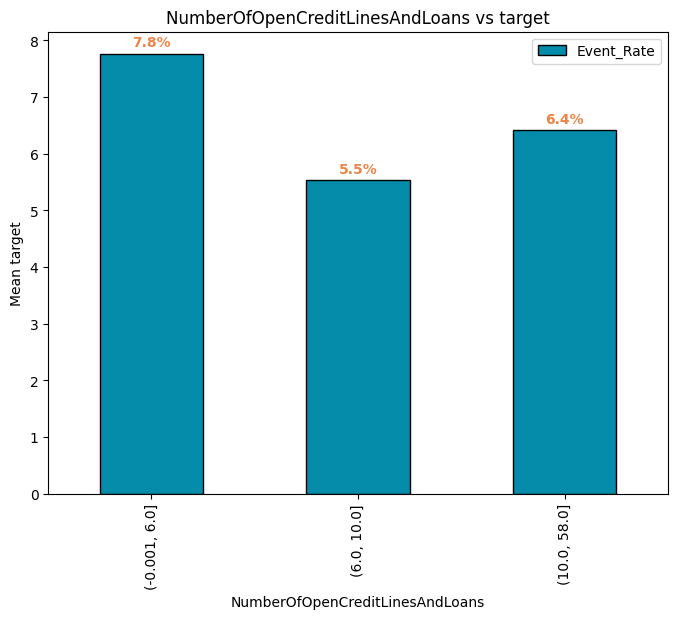

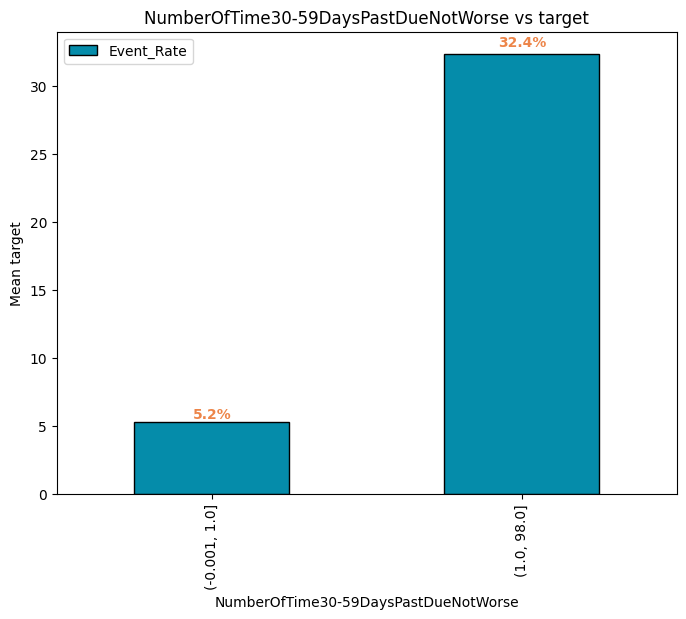

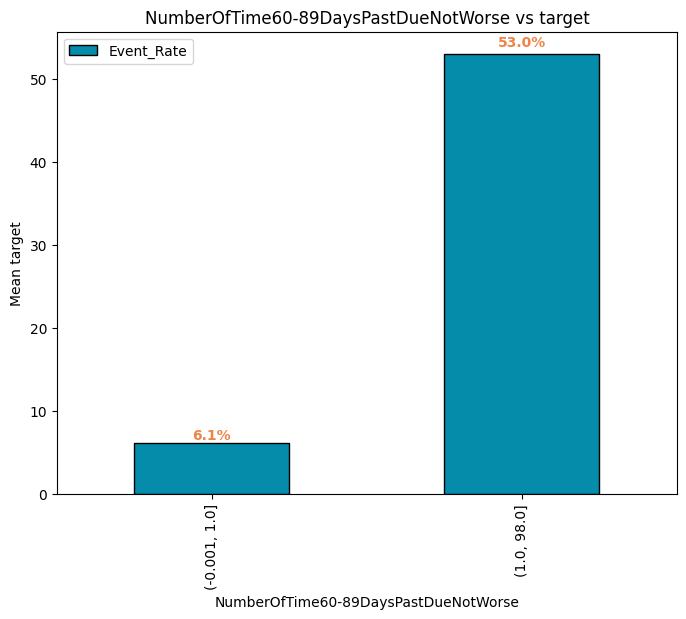

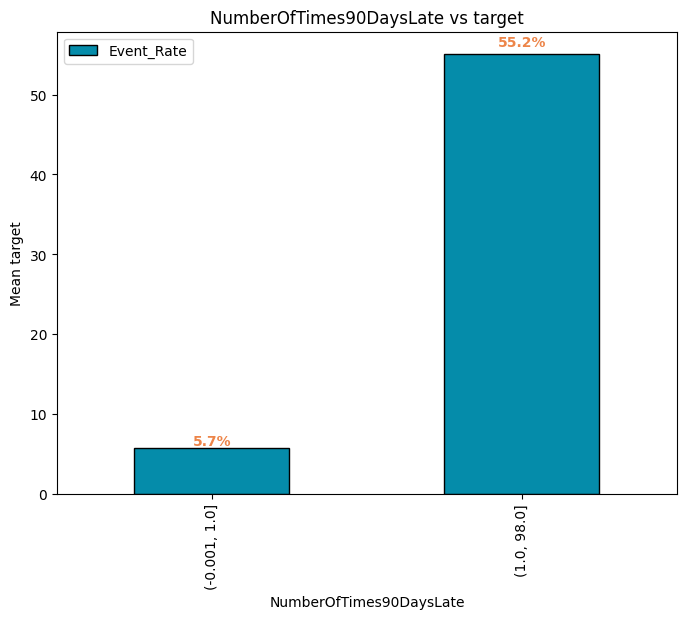

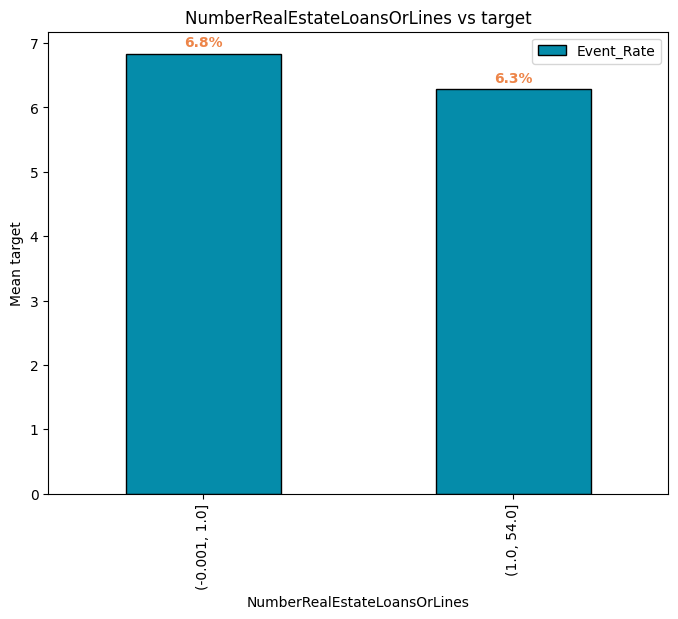

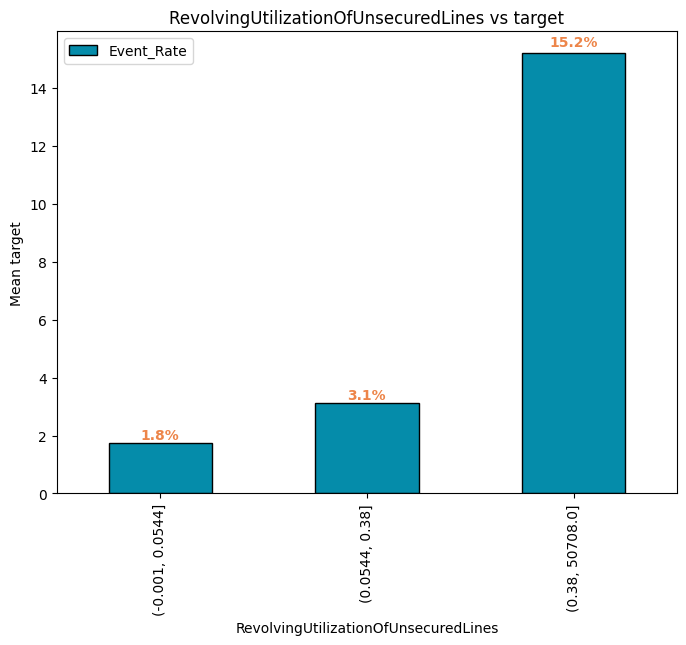

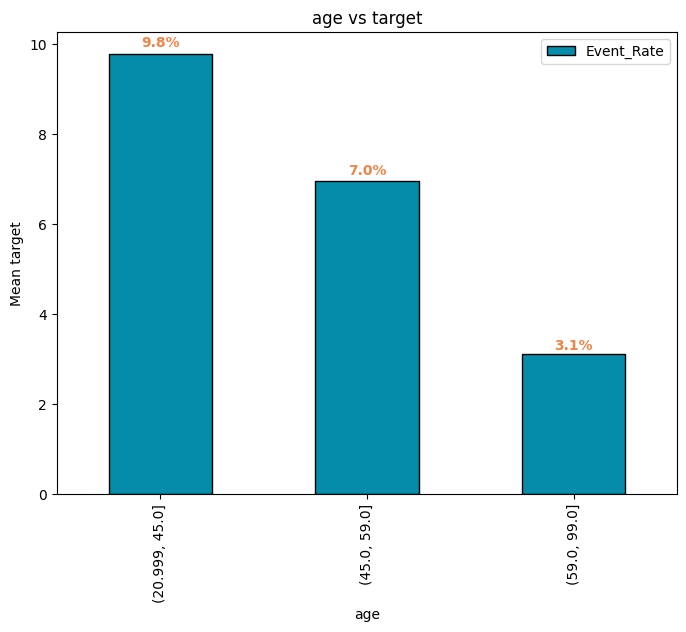

BarCharts(bar_type='v')

In [35]:
woe_df = clf.woe_df
from xverse.graph import BarCharts
clf = BarCharts(bar_type='v')
clf.plot(woe_df)

### Identify features,  target and split it into train and test

In [ ]:
# from xverse.ensemble import VotingSelector
# clf = VotingSelector()
# clf.fit(X,y)



In [ ]:
# clf.feature_importances_

In [ ]:
# clf.feature_votes_

In [ ]:
# out_X = clf.transform(X)
# out_X

In [36]:
# from xverse.transformer import WOE

# clf = WOE()
# clf.fit(out_X, y)

# out_X = clf.transform(out_X)
# out_X = out_X2
out_X.columns

Index(['DebtRatio', 'MonthlyIncome', 'NumberOfDependents',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'RevolvingUtilizationOfUnsecuredLines',
       'age'],
      dtype='object')

In [37]:
# Droping columns that are not needed - DebtRatio, NumberRealEstateLoansOrLines

out_X = out_X[['MonthlyIncome', 'NumberOfDependents',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'RevolvingUtilizationOfUnsecuredLines',
       'age']]

# X = X[['NumberOfTime30-59DaysPastDueNotWorse',
#        'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
#        'age','MonthlyIncome', 'NumberOfDependents', 'NumberOfOpenCreditLinesAndLoans']]
out_X

,MonthlyIncome,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,age
0,-0.291730,0.269425,-0.043910,1.900745,-0.098001,-0.176694,0.916313,0.414695
1,0.300514,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,0.916313,0.414695
2,0.300514,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,0.916313,0.414695
3,0.300514,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,-0.801905,0.414695
4,-0.291730,-0.088289,-0.200241,-0.257722,-0.098001,-0.176694,0.916313,0.043665
...,...,...,...,...,...,...,...,...
149995,0.300514,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,-1.390374,-0.804931
149996,-0.091023,0.269425,0.161768,-0.257722,-0.098001,-0.176694,-0.801905,0.414695
149997,-0.091023,-0.088289,-0.043910,-0.257722,-0.098001,-0.176694,-0.801905,0.043665
149998,-0.091023,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,-1.390374,0.414695


In [ ]:
out_X.columns

Index(['MonthlyIncome', 'NumberOfDependents',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'RevolvingUtilizationOfUnsecuredLines', 'age'],
      dtype='object')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(out_X, y, test_size= 0.2, random_state= 42)
X_train.shape, X_test.shape, len(y_train), len(y_test)

((119988, 8), (29998, 8), 119988, 29998)

### Logistic Regression from scratch using gradient method (2 points)

For Linear Regression, we had the hypothesis $yhat = w.X +b$ , whose output range was the set of all Real Numbers.
Now, for Logistic Regression our hypothesis is  $yhat = sigmoid(w.X + b)$ , whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$yhat = \frac{1}{1 +e^{-(w.x+b)}}$


In [39]:
def sigmoid(x):
  return np.maximum(np.minimum(1 / (1 + np.exp(-x)), 0.9999), 0.0001)

def cost_function(x, y, theta):
  t = x.dot(theta)
  return - np.sum(y * np.log(sigmoid(t)) + (1 - y) * np.log(1 - sigmoid(t))) / x.shape[0]

def gradient_cost_function(x, y, theta):
  t = x.dot(theta)
  return x.T.dot(y - sigmoid(t)) / x.shape[0]

def update_theta(x, y, theta, learning_rate):
  return theta + learning_rate * gradient_cost_function(x, y, theta)

def train(x, y, learning_rate, iterations=500, threshold=0.0001):
  theta = np.zeros(x.shape[1])
  costs = []

  print("Start training")

  for i in range(iterations):
    theta = update_theta(x, y, theta, learning_rate)
    cost = cost_function(x, y, theta)
    print(f'[Training step #{i}] - Cost function: {cost:.4f}')
    costs.append({'cost': cost, 'weights': theta})
    if i > 15 and abs(costs[-2]['cost'] - costs[-1]['cost']) < threshold:
      break

  return theta, costs

def predict(x, theta):
  return (sigmoid(x.dot(theta)) >= 0.5).astype(int)

def get_accuracy(x, y, theta):
  y_pred = predict(x, theta)
  return (y_pred == y).sum() / y.shape[0]

In [40]:
# costs
Theta, costs = train(X_train, y_train, learning_rate=0.001)
print(f'Accuracy on the training set: {get_accuracy(X_train, y_train, Theta)}')
print(f'Accuracy on the test set: {get_accuracy(X_test, y_test, Theta)}')

Start training
[Training step #0] - Cost function: 0.6931
[Training step #1] - Cost function: 0.6930
[Training step #2] - Cost function: 0.6929
[Training step #3] - Cost function: 0.6928
[Training step #4] - Cost function: 0.6928
[Training step #5] - Cost function: 0.6927
[Training step #6] - Cost function: 0.6926
[Training step #7] - Cost function: 0.6925
[Training step #8] - Cost function: 0.6924
[Training step #9] - Cost function: 0.6924
[Training step #10] - Cost function: 0.6923
[Training step #11] - Cost function: 0.6922
[Training step #12] - Cost function: 0.6921
[Training step #13] - Cost function: 0.6920
[Training step #14] - Cost function: 0.6920
[Training step #15] - Cost function: 0.6919
[Training step #16] - Cost function: 0.6918
Accuracy on the training set: 0.7008534186752009
Accuracy on the test set: 0.7013134208947264


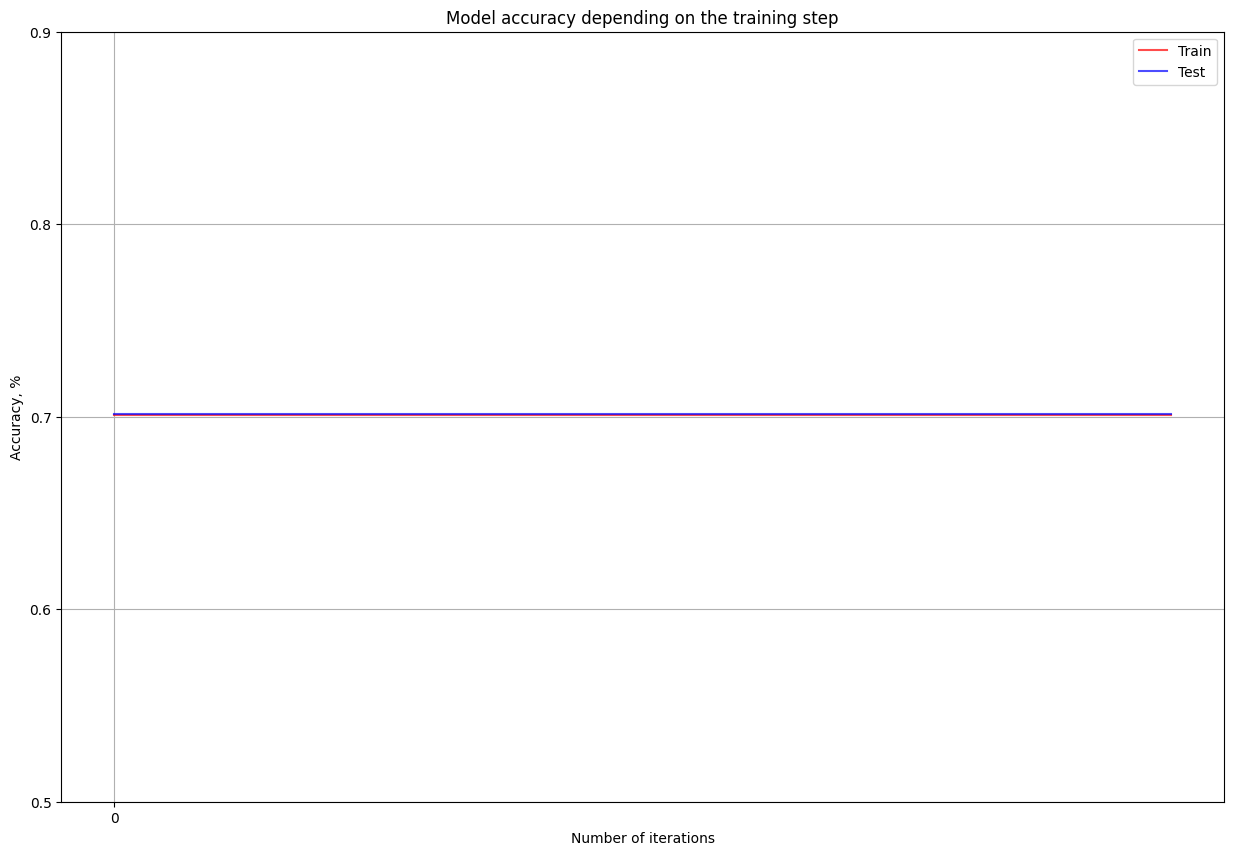

In [41]:
plt.figure(figsize=(15,10))
plt.title('Model accuracy depending on the training step')

plt.plot(np.arange(0, len(costs)), [get_accuracy(X_train, y_train, c['weights']) for c in costs], alpha=0.7, label='Train', color='r')
plt.plot(np.arange(0, len(costs)), [get_accuracy(X_test, y_test, c['weights']) for c in costs], alpha=0.7, label='Test', color='b')

plt.xlabel('Number of iterations')
plt.ylabel('Accuracy, %')
plt.legend(loc='best')

plt.grid(True)
plt.xticks(np.arange(0, len(costs)+1, 40))
plt.yticks(np.arange(0.5, 1, 0.1))
plt.show()

### Implement the Logistic regression using sklearn

As there is imbalance in the class distribution, add weightage to the Logistic regression.

* Find the accuracy with class weightage in Logistic regression
* Find the accuracy without class weightage in Logistic regression


In [50]:
df_filtered.SeriousDlqin2yrs.value_counts()

0    139961
1     10025
Name: SeriousDlqin2yrs, dtype: int64

In [51]:
X_train.shape

(119988, 8)

In [71]:
# penalty='elasticnet', l1_ratio=0.5, class_weight='balanced'

w = {0:6, 1:94} #define class weights
classifier = LogisticRegression(solver='saga', random_state = 0, class_weight=w)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17990 10033]
 [  357  1618]]
0.6536435762384158
              precision    recall  f1-score   support

           0       0.98      0.64      0.78     28023
           1       0.14      0.82      0.24      1975

    accuracy                           0.65     29998
   macro avg       0.56      0.73      0.51     29998
weighted avg       0.93      0.65      0.74     29998



Text(0.5, 1.0, '2-class Precision-Recall curve')

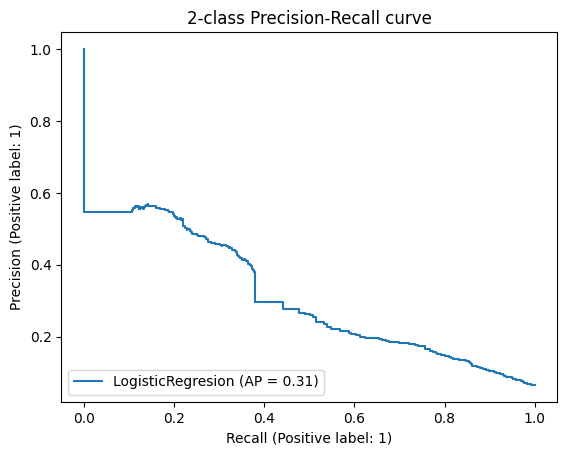

In [54]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="LogisticRegresion"
    )
display.ax_.set_title("2-class Precision-Recall curve")

In [55]:

# # Code to understand the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negative: ",tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)
print()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(precision)
print(recall)

True Negative:  17990
False Positive:  10033
False Negative:  357
True Positive:  1618

0.13887219981117502
0.8192405063291139


In [56]:
# Logistic Regression Without weightage

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[27880   143]
 [ 1754   221]]
0.9367624508300554
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     28023
           1       0.61      0.11      0.19      1975

    accuracy                           0.94     29998
   macro avg       0.77      0.55      0.58     29998
weighted avg       0.92      0.94      0.92     29998



Text(0.5, 1.0, '2-class Precision-Recall curve')

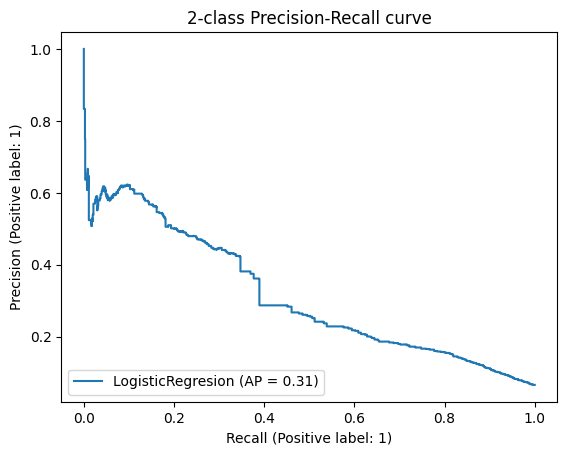

In [57]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="LogisticRegresion"
    )
display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
out_X

,MonthlyIncome,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,age
0,-0.291730,0.269425,-0.043910,1.900745,-0.098001,-0.176694,0.916313,0.414695
1,0.300514,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,0.916313,0.414695
2,0.300514,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,0.916313,0.414695
3,0.300514,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,-0.801905,0.414695
4,-0.291730,-0.088289,-0.200241,-0.257722,-0.098001,-0.176694,0.916313,0.043665
...,...,...,...,...,...,...,...,...
149995,0.300514,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,-1.390374,-0.804931
149996,-0.091023,0.269425,0.161768,-0.257722,-0.098001,-0.176694,-0.801905,0.414695
149997,-0.091023,-0.088289,-0.043910,-0.257722,-0.098001,-0.176694,-0.801905,0.043665
149998,-0.091023,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,-1.390374,0.414695


### Credit scoring

When scaling the model into a scorecard, we will need both the Logistic Regression coefficients from model fitting as well as the transformed WoE values. We will also need to convert the score from the model from the log-odds unit to a points system.
For each independent variable Xi, its corresponding score is:

$Score = \sum_{i=1}^{n} (-(β_i × WoE_i + \frac{α}{n}) × Factor + \frac{Offset}{n})$

Where:

βi — logistic regression coefficient for the variable Xi

α — logistic regression intercept

WoE — Weight of Evidence value for variable Xi

n — number of independent variable Xi in the model

Factor, Offset — known as scaling parameter

  - Factor = pdo / ln(2); pdo is points to double the odds
  - Offset = Round_of_Score - {Factor * ln(Odds)}

In [58]:
# Scaling factors
factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))
factor, offset

(28.85390081777927, 487.1228762045055)

In [59]:
n = len(out_X.columns)
Bi = classifier.coef_
alpha = classifier.intercept_

Bi, alpha, n
out_X

,MonthlyIncome,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,age
0,-0.291730,0.269425,-0.043910,1.900745,-0.098001,-0.176694,0.916313,0.414695
1,0.300514,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,0.916313,0.414695
2,0.300514,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,0.916313,0.414695
3,0.300514,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,-0.801905,0.414695
4,-0.291730,-0.088289,-0.200241,-0.257722,-0.098001,-0.176694,0.916313,0.043665
...,...,...,...,...,...,...,...,...
149995,0.300514,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,-1.390374,-0.804931
149996,-0.091023,0.269425,0.161768,-0.257722,-0.098001,-0.176694,-0.801905,0.414695
149997,-0.091023,-0.088289,-0.043910,-0.257722,-0.098001,-0.176694,-0.801905,0.043665
149998,-0.091023,-0.088289,0.161768,-0.257722,-0.098001,-0.176694,-1.390374,0.414695


<Axes: ylabel='Count'>

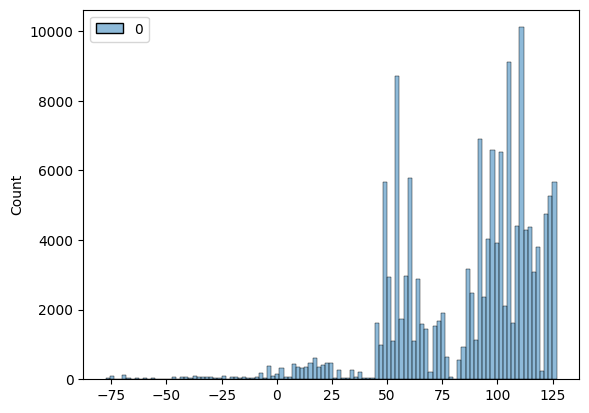

In [60]:
score = -(out_X @ Bi.T + alpha/n) * factor + offset/n
sns.histplot(data=score)

Credit Scores:
[406.96011462 378.10351837 424.25468175 ... 367.83172999 433.1985027
 370.3676401 ]


<Axes: ylabel='Count'>

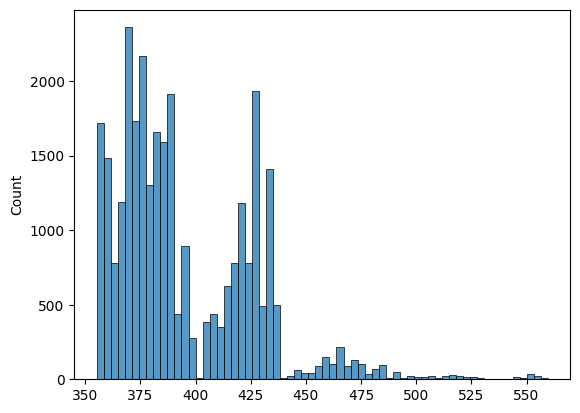

In [62]:

# Make predictions on the test set

# Scaling factors
factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))
factor, offset
y_pred_prob = classifier.predict_proba(X_test)[:, 1]  # Predicted probabilities of class 1

credit_scores = offset + factor * np.log(y_pred_prob / (1 - y_pred_prob))

# Print credit scores
print("Credit Scores:")
print(credit_scores)
sns.histplot(data=credit_scores)

### Performance Metrics

In [76]:
w = {0:6, 1:94} #define class weights
classifier = LogisticRegression(solver='saga', random_state = 0, class_weight=w)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Precision

In [77]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
print(precision)

0.13887219981117502


#### Recall

In [78]:
recall = tp/(tp+fn)
print(recall)

0.8192405063291139


#### Classification Report

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.64      0.78     28023
           1       0.14      0.82      0.24      1975

    accuracy                           0.65     29998
   macro avg       0.56      0.73      0.51     29998
weighted avg       0.93      0.65      0.74     29998



#### Confusion matrix

In [80]:
print(cm)

[[17990 10033]
 [  357  1618]]


### Report Analysis

* Comment on the performance of the model with weightage and without weightage
* Have you tried implementing Logistic regression with normal features instead of WOE ?
  - Compare the classification report for both implementations